In [70]:
import simmosq as sm
import numpy as np
import matplotlib.pyplot as plt

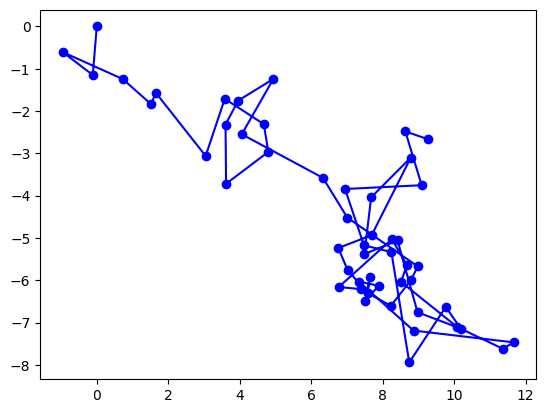

In [71]:
mosquitoes = sm.Mosquitoes(positions=[[0, 0]])
parameters = {'covariance_matrix': np.diag([1,1]),
              'death_prob': 0}
simulation = sm.SimulationController(mosquitoes=mosquitoes, model_mosq_movement=sm.RandomDiffusion())

# Extract x and y coordinates
path = [state._positions for state in simulation.run(parameters, 50)]
x_coords = [pos[0][0] for pos in path]
y_coords = [pos[0][1] for pos in path]

# Plotting the path
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
plt.show()

In [72]:
#Now to try with more than 1 mosquito
mosquitoes = sm.Mosquitoes(positions = [[0, 0] for _ in range(5)])
parameters = {'covariance_matrix': np.diag([1,1]),
              'death_prob': 0}
simulation = sm.SimulationController(mosquitoes=mosquitoes, model_mosq_movement=sm.RandomDiffusion())
paths = [state._positions for state in simulation.run(parameters, 10)]

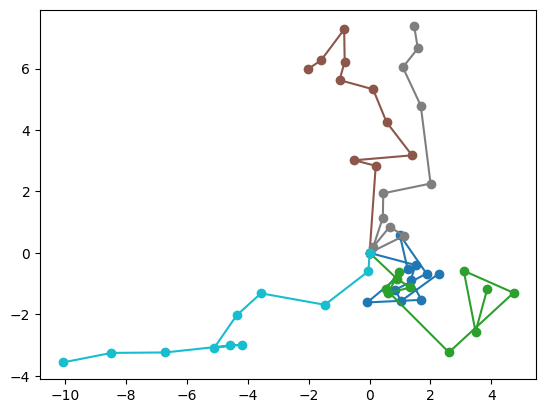

In [73]:
#Get number of mosquitoes
n_mosquitoes = mosquitoes._n_mosquitoes
#Make empty list for mosquito paths to go into
mosquito_paths = [[] for _ in range(n_mosquitoes)]

#Fill list
for step in paths:
    for i in range(n_mosquitoes):
        mosquito_paths[i].append(step[i])


cmap = plt.get_cmap('tab10')  
colors = cmap(np.linspace(0, 1, n_mosquitoes))

for i, path in enumerate(mosquito_paths):

    x_coords = [pos[0] for pos in path]
    y_coords = [pos[1] for pos in path]
    
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color=colors[i])

plt.show()

In [151]:
#Now for the density plot
mosquitoes = sm.Mosquitoes(positions = [[0, 0] for _ in range(20000)])
parameters = {'covariance_matrix': np.diag([1,1]),
              'death_prob': 0}
simulation = sm.SimulationController(mosquitoes=mosquitoes, model_mosq_movement=sm.RandomDiffusion())
paths = [state._positions for state in simulation.run(parameters, 20)]

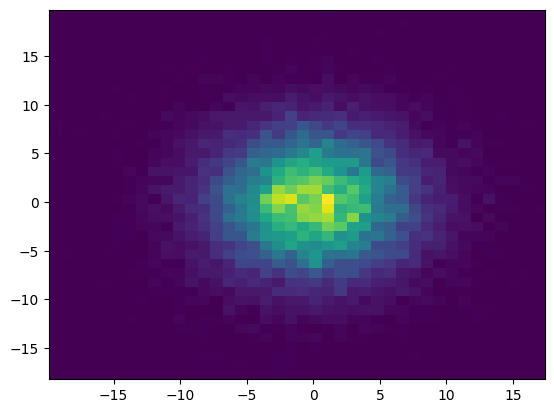

In [155]:
final_pos = paths[-1]
x_coords = [pos[0] for pos in final_pos]
y_coords = [pos[1] for pos in final_pos]

plt.hist2d(x_coords, y_coords, bins = [40,40])
plt.show()

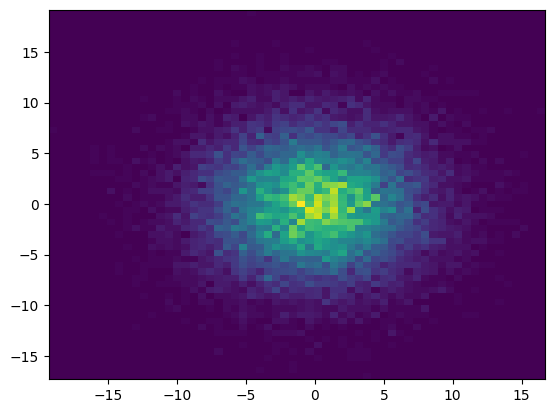

In [145]:
#Attempting some kind of animation - NOT WORKING 
import matplotlib.animation as animation
fig, ax = plt.subplots()
artists = []
for i in range(len(paths)):
    ax.clear()
    x_coords = [pos[0] for pos in paths[i]]
    y_coords = [pos[1] for pos in paths[i]]
    container = ax.hist2d(x_coords, y_coords, bins = [60,60])
    artists.append(container)
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=50, repeat_delay=1000, blit = False)
plt.show()